<a href="https://colab.research.google.com/github/ohreally24/BP/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Executive Summary**

# **Introduction**

# **Analysis and Discussion**

In [1]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2022-05-29 07:38:20--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2022-05-29 07:38:21--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  64.7MB/s    in 42s     

2022-05-29 07:39:03 (19.6 MB/s) - ‘enron.db’ saved [853819392/853819392]



# **Pre-Req**

In [2]:
#Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn

#import sqlite3
import sqlite3

#import pandas
import pandas as pd

#Create connection and cursor object
conn = sqlite3.connect('enron.db')
c = conn.cursor()

#**Busiest Email Periods**

In [31]:
#sql
sql_date = '''
SELECT date(date) AS date_sent, count(mid) AS message_count
 FROM message
 GROUP BY date_sent
 ORDER BY date_sent;
 '''

#Load data in dataframe
df_email_by_date = pd.read_sql_query(sql_date, conn)

#Display dataframe for all number of messages sent by date
df_email_by_date

,date_sent,message_count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
1318,2020-12-24,1
1319,2020-12-29,1
1320,2043-12-28,1
1321,2044-01-02,1


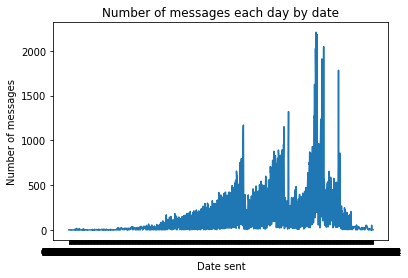

In [37]:
#Plot dataframe on graph
plt.plot(df_email_by_date.date_sent,df_email_by_date.message_count)
plt.title("Number of messages each day by date")
plt.xlabel("Date sent")
plt.ylabel("Number of messages")
plt.show()

In [48]:
#Display dataframe for top 10 highest email sent each day
#df_email_by_date = df_email_by_date.nlargest(n=10, columns=['message_count']) #see reference 1
#df_email_by_date

top_10 = df_email_by_date.nlargest(10, 'message_count') #reference 3
top_10

,date_sent,message_count
1075,2001-10-25,2207
1079,2001-10-29,2180
1108,2001-11-27,2045
1107,2001-11-26,2031
1072,2001-10-22,2025
1076,2001-10-26,1978
1074,2001-10-24,1936
1100,2001-11-19,1909
1172,2002-01-30,1783
1073,2001-10-23,1763


# **Top 10 Emailers**

In [14]:
#sql
sql_emailers = '''
SELECT sender, count(mid) AS message_count
  FROM message
  GROUP BY sender
  ORDER BY message_count DESC
  limit 10;
 '''

#Load data in dataframe
df_emailers = pd.read_sql_query(sql_emailers, conn)
df_emailers
#df_emailers.nlargest(10, 'message_count') #see reference 1

,sender,message_count
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
5,chris.germany@enron.com,3686
6,no.address@enron.com,3511
7,enron.announcements@enron.com,2838
8,matthew.lenhart@enron.com,2784
9,debra.perlingiere@enron.com,2549


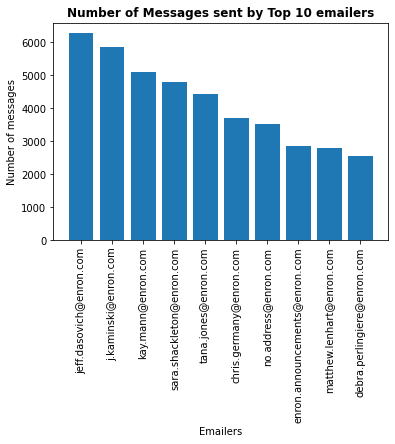

In [37]:
#plot on graph
plt.bar(df_emailers.sender,df_emailers.message_count)

plt.xticks(rotation = 90) #ref4

plt.title("Number of Messages sent by Top 10 emailers", fontweight='bold')
plt.xlabel("Emailers")
plt.ylabel("Number of messages")

plt.show()



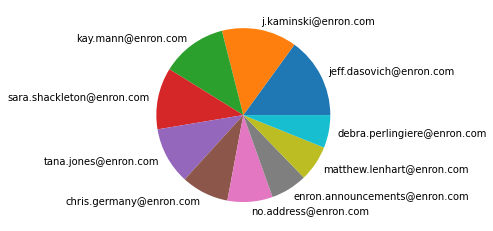

In [18]:
plt.pie(df_emailers.message_count, labels = df_emailers.sender)
plt.show()

# References

Author Surname, Initial(s) or Organisation. (year). *Title of webpage in italics*. Site name. URL



1. https://datascientyst.com/get-top-10-highest-lowest-values-pandas/
2. https://funprojects.blog/2021/12/27/6-lines-of-python-to-plot-sqlite-data/
3. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html
4. https://stackoverflow.com/questions/67823936/plot-graph-with-vertical-labels-on-the-x-axis-matplotlib